**Import all necessary libraries

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('fast')
!pip install missingno
import missingno as msngno 
%matplotlib inline
import ast
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [158]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

# kaggle 추가 데이터
train_extra = pd.read_csv('input/TrainAdditionalFeatures.csv')
test_extra = pd.read_csv('input/TestAdditionalFeatures.csv')

# 기존 데이터와 합침
train = pd.merge(train, train_extra, how='left', on=['imdb_id'])
test = pd.merge(test, test_extra, how='left', on=['imdb_id'])



In [159]:
train.shape, test.shape

((3000, 26), (4398, 25))

In [160]:
train_extra.shape, test_extra.shape

((2887, 4), (4232, 4))

In [161]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.0,482.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.4,1528.0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,26.082,8.4,7314.0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,5.531,7.5,115.0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,NaN,NaN,NaN


### 잘못된 데이터 값 수정 (kaggel 에서 제공되어있음)

In [162]:
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000


test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

### 결측치 확인

In [163]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
popularity2               118
rating                    118
totalVotes                118
dtype: int64

### train 히트맵

<AxesSubplot:>

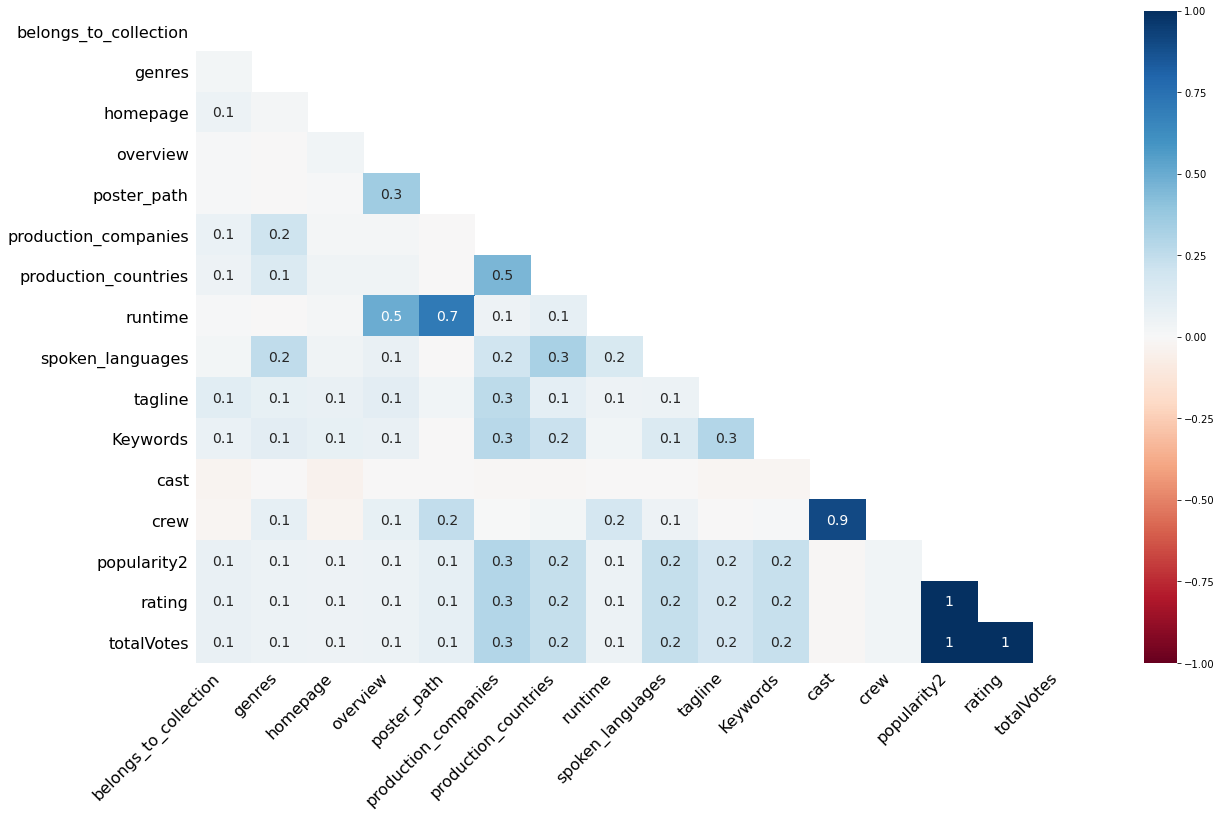

In [164]:
msngno.heatmap(train)

#### JSON 형식의 feature를 Dictinary 형태로  변환

In [165]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train = text_to_dict(train)
test = text_to_dict(test)

In [166]:
train.isna().sum()

id                          0
belongs_to_collection       0
budget                      0
genres                      0
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies        0
production_countries        0
release_date                0
runtime                     2
spoken_languages            0
status                      0
tagline                   597
title                       0
Keywords                    0
cast                        0
crew                        0
revenue                     0
popularity2               118
rating                    118
totalVotes                118
dtype: int64

#### release_date를 연, 월, 일 로 나눠서 매핑

In [167]:
train['release_year']=pd.to_datetime(train['release_date']).dt.year
train['release_month']=pd.to_datetime(train['release_date']).dt.month
train['release_day']=pd.to_datetime(train['release_date']).dt.dayofweek


test['release_year']=pd.to_datetime(test['release_date']).dt.year
test['release_month']=pd.to_datetime(test['release_date']).dt.month
test['release_day']=pd.to_datetime(test['release_date']).dt.dayofweek


#### rating, totalVotes, runtime 특징 값들을 평균값으로 매핑

In [168]:
train['rating']=train['rating'].fillna(train['rating'].mean())
test['rating']=test['rating'].fillna(test['rating'].mean())

train['totalVotes']=train['totalVotes'].fillna(train['totalVotes'].mean())
train['totalVotes']=train['totalVotes'].round()
test['totalVotes']=test['totalVotes'].fillna(test['totalVotes'].mean())
test['totalVotes']=test['totalVotes'].round()

train['runtime']=train['runtime'].fillna(train['runtime'].mean())
test['runtime']=test['runtime'].fillna(test['runtime'].mean())

#### 결측치가 있는 feature를 1,0으로 매핑

In [169]:
train['numberofgenres']=train['genres'].apply(lambda x: len(x) if x != {} else 0)
train['nameofcollection'] = train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['genres_info'] = train['genres'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['language'] = train['spoken_languages'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['production_country'] = train['production_countries'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['production_company'] = train['production_companies'].apply(lambda x: x[0]['name'] if x != {} else 0)

In [170]:
test['numberofgenres']=train['genres'].apply(lambda x: len(x) if x != {} else 0)
test['numberofgenres']=test['numberofgenres'].replace(np.nan,0)
test['nameofcollection'] = test['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['genres_info'] = test['genres'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['language'] = test['spoken_languages'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['production_country'] = test['production_countries'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['production_company'] = test['production_companies'].apply(lambda x: x[0]['name'] if x != {} else 0)

#### Feature Engineering 

In [171]:
train['lang_english']=0
train.loc[train['original_language'].astype(str)=="en","lang_english"]=1

# 예산과 런타임
train['bud_runtime']=(train['budget']+1)/(train['runtime']+1)

# 예산과 연도
train['bud_year']=(train['budget']+1)/(train['release_year']+1)

# 예산과 인기도
train['bud_popularity']=(train['budget']+1)/(train['popularity']+1)

# 런타임과 연도
train['runtime_year']=(train['runtime']+1)/(train['release_year']+1)

# 인기도와 연도
train['popularity_year']=(train['popularity']+1)/(train['release_year']+1)

In [172]:
test['lang_english']=0
test.loc[test['original_language'].astype(str)=="en","lang_english"]=1

test['bud_runtime']=(test['budget']+1)/(test['runtime']+1)

test['bud_year']=(test['budget']+1)/(test['release_year']+1)

test['bud_popularity']=(test['budget']+1)/(test['popularity']+1)

test['runtime_year']=(test['runtime']+1)/(test['release_year']+1)

test['popularity_year']=(test['popularity']+1)/(test['release_year']+1)

#### 존재유뮤를 나타내는 feature 값을 0,1 로 매핑

In [173]:
train['homepage'] = train['homepage'].fillna(0)
train['homepage'] = train['homepage'].apply(lambda x: 0 if x==0 else 1)

train['overview'] = train['overview'].fillna(0)
train['overview'] = train['overview'].apply(lambda x: 0 if x==0 else 1)

train['poster_path'] = train['poster_path'].fillna(0)
train['poster_path'] = train['poster_path'].apply(lambda x: 0 if x==0 else 1)

train['tagline'] = train['tagline'].fillna(0)
train['tagline'] = train['tagline'].apply(lambda x: 0 if x==0 else 1)


In [174]:
test['homepage'] = test['homepage'].fillna(0)
test['homepage'] = test['homepage'].apply(lambda x: 0 if x==0 else 1)

test['overview'] = test['overview'].fillna(0)
test['overview'] = test['overview'].apply(lambda x: 0 if x==0 else 1)

test['poster_path'] = test['overview'].fillna(0)
test['poster_path'] = test['poster_path'].apply(lambda x: 0 if x==0 else 1)

test['tagline'] = test['tagline'].fillna(0)
test['tagline'] = test['tagline'].apply(lambda x: 0 if x==0 else 1)

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  3000 non-null   object 
 2   budget                 3000 non-null   int64  
 3   genres                 3000 non-null   object 
 4   homepage               3000 non-null   int64  
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               3000 non-null   int64  
 9   popularity             3000 non-null   float64
 10  poster_path            3000 non-null   int64  
 11  production_companies   3000 non-null   object 
 12  production_countries   3000 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                3000 non-null   float64
 15  spok

#### 연도별 예산, 인기도, 런타임을 평균값으로 매핑

In [176]:
test['release_year']=test['release_year'].fillna(test['release_year'].mode()[0])
test['release_month']=test['release_month'].fillna(test['release_month'].mode()[0])
test['release_day']=test['release_day'].fillna(test['release_day'].mode()[0])

test['bud_year']=test['bud_year'].fillna(test['bud_year'].mean())

test['popularity_year']=test['popularity_year'].fillna(test['popularity_year'].mean())

test['runtime_year']=test['runtime_year'].fillna(test['runtime_year'].mean())

#### Release Month with Revenue

Text(0.5, 1.0, 'Release Month vs Revenue')

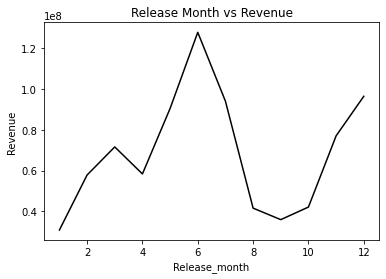

In [177]:
train.groupby('release_month')['revenue'].mean().plot(color='black')
plt.xlabel('Release_month',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10)
plt.title("Release Month vs Revenue")

#### Release Day with Revenue

Text(0.5, 1.0, 'Release Day vs Revenue')

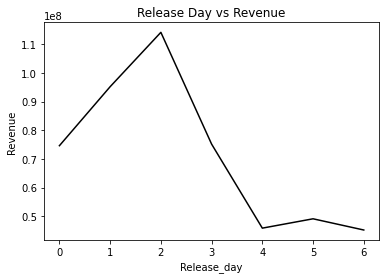

In [178]:
train.groupby('release_day')['revenue'].mean().plot(color='black')
plt.xlabel('Release_day',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10)
plt.title("Release Day vs Revenue")

#### Revenue VS Budget

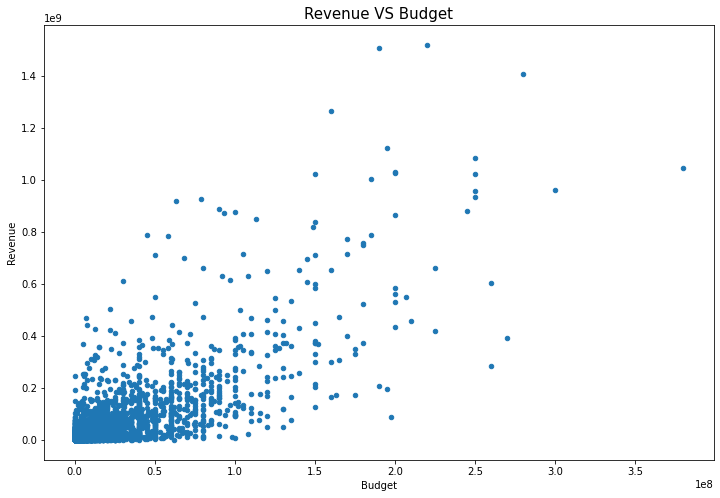

In [179]:
train[['budget','revenue']].plot(kind='scatter',x='budget',y='revenue',figsize=(12,8))
plt.title("Revenue VS Budget",fontsize=15)
plt.xlabel('Budget',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10)
plt.show()

#### feature 제거

In [180]:
train = train.drop(['belongs_to_collection','genres','production_companies','nameofcollection','imdb_id','overview','poster_path','tagline','original_title','original_language','release_date','language','production_countries','cast','spoken_languages',
                    'Keywords', 'status','genres_info','production_company','production_country','title','crew','popularity2'], axis=1)

test = test.drop(['belongs_to_collection','genres','production_companies','nameofcollection','imdb_id','overview','poster_path','tagline','original_title','original_language','release_date','language','production_countries','cast','spoken_languages',
                    'Keywords', 'status','genres_info','production_company','production_country','title','crew','popularity2'], axis=1)


#### 예산, 수익 정규화

In [181]:
test['budget']=np.log1p(test['budget'])
train['budget']=np.log1p(train['budget'])

train['revenue']=np.log1p(train['revenue'])

In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3000 non-null   int64  
 1   budget           3000 non-null   float64
 2   homepage         3000 non-null   int64  
 3   popularity       3000 non-null   float64
 4   runtime          3000 non-null   float64
 5   revenue          3000 non-null   float64
 6   rating           3000 non-null   float64
 7   totalVotes       3000 non-null   float64
 8   release_year     3000 non-null   int64  
 9   release_month    3000 non-null   int64  
 10  release_day      3000 non-null   int64  
 11  numberofgenres   3000 non-null   int64  
 12  lang_english     3000 non-null   int64  
 13  bud_runtime      3000 non-null   float64
 14  bud_year         3000 non-null   float64
 15  bud_popularity   3000 non-null   float64
 16  runtime_year     3000 non-null   float64
 17  popularity_yea

#### 수익과 나머지 특징과의 중요도

In [183]:
train.corr().revenue

id                 0.009286
budget             0.534437
homepage           0.143550
popularity         0.289333
runtime            0.210903
revenue            1.000000
rating             0.109641
totalVotes         0.405178
release_year      -0.079965
release_month      0.030696
release_day       -0.043816
numberofgenres     0.190791
lang_english       0.195113
bud_runtime        0.377605
bud_year           0.494859
bud_popularity     0.348547
runtime_year       0.214965
popularity_year    0.290733
Name: revenue, dtype: float64

#### 모델링

In [184]:
# 훈련세트 수익
y=train.revenue

# revenue를 제외한 나머지 특성
X=train.drop( columns= ['revenue'])

#### 훈련, 테스트 셋으로 나눔

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=0.2,random_state=39)

#### LinearRegression 

In [187]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_pred=lr_model.predict(X_val)

lr_rmse= mean_squared_error(y_val, lr_pred, squared=False)
print('Linear Regression rmse= ', lr_rmse)

Linear Regression rmse=  2.647542848691148


#### RandomForestRegressor

In [188]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(random_state=42,max_features='auto', n_estimators= 50, min_samples_leaf=2)
rfr_model.fit(X_train,y_train)
rfr_pred = rfr_model.predict(X_val)

rfr_rmse= mean_squared_error(y_val, rfr_pred, squared=False)
print('Random Forest rmse = ', rfr_rmse)

Random Forest rmse =  2.3881843039349118


#### XGBoost

In [190]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective = 'reg:linear',eta = 0.01,max_depth = 3,min_child_weight = 3,subsample = 0.8,gamma = 1.45,colsample_bytree = 0.7, eval_metric = 'rmse',seed = 42,n_estimators = 3000)
xgb_model.fit(X,y)
xgb_pred = xgb_model.predict(X_val)
xgb_rmse= mean_squared_error(y_val, xgb_pred, squared=False)
print('XGBoost rmse = ',xgb_rmse)

[17:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost rmse =  1.3508492148410796


#### submission 생성

In [191]:
# Linear Regression
lr_model.fit(X,y)
lr_pred_full = lr_model.predict(test)
lr_pred_full = np.exp(lr_pred_full)
rand_lr = pd.DataFrame(lr_pred_full)

linear_regression = pd.concat([test["id"],rand_lr], axis =1)
linear_regression.columns = ['id', 'revenue']
linear_regression.to_csv(r'linear_regression.csv',index = False)


In [192]:
# Random Forest
rfr_model.fit(X,y)
rfr_pred_full = rfr_model.predict(test)
rfr_pred_full = np.exp(rfr_pred_full)
rand_rf = pd.DataFrame(rfr_pred_full)

random_forest = pd.concat([test["id"],rand_rf], axis =1)
random_forest.columns = ['id', 'revenue']
random_forest.to_csv(r'random_forest.csv',index = False)


In [193]:
# XGBoost
xgb_model.fit(X, y)
xgb_pred_full = xgb_model.predict(test)
xgb_pred_full = np.exp(xgb_pred_full)
rand_xgb = pd.DataFrame(xgb_pred_full)

xgb = pd.concat([test["id"],rand_xgb], axis =1)
xgb.columns =['id', 'revenue']
xgb.to_csv(r'xgb.csv',index = False)

[17:05:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
